# Movies Dataset from Pirated Sites的数据分析及预处理
*学号：<u>1120202579</u> 姓名：<u>彭高鹏</u>*

In [1]:
import numpy as np 
import pandas as pd 
import os
import matplotlib.pyplot as plt
import seaborn as sns

### 1. 数据集简介
该数据集是从盗版网站收集的，该网站每月约有 200 万访问者的用户群。该数据包含来自好莱坞、宝莱坞、动漫等所有行业的 20,000+ 多部电影。<br/><br/>
数据集的各个属性的简要描述如下：<br/>
**id**: 电影的唯一 ID <br/>
**title**: 电影的标题 <br/>
**storyline**: 电影的简短描述 <br/>
**views**: 每部电影的点击次数 <br/>
**downloads**: 每部电影的下载量 <br/>
**IMDb-rating**: IMDb上的评分 <br/>
**appropriate_for**: 适合人群分级，有R-rated，PG-13等 <br/>
**language**: 电影的语言 <br/>
**industry**: 电影的制作行业，如好莱坞，宝莱坞等<br/>
**posted_date**: 电影在平台上发布的时间 <br/>
**release_date**: 这部电影在全球上映的时间 <br/>
**runtime**: 电影的时长，以分钟或小时为单位 <br/>
**director**: 电影导演的名称 <br/>
**writer**: 所有编剧的名单 <br/>

下面对数据集的csv文件进行读取，并展示前几个数据对象

In [2]:
# 自定义函数，用于将时间转换为分钟
def transform_runtime(runtime):
    total_minutes = 0
    if runtime.strip() == '':
        return None
    if 'h' in runtime:
        hours, minutes = runtime.split('h')
        hours = int(hours)
        if minutes:
            minutes = int(minutes[0:2].strip())
            total_minutes = hours * 60 + minutes
        else:
            total_minutes = hours * 60
    else:  
        total_minutes = int(runtime.replace('min', '').strip())
    return total_minutes

In [3]:
df = pd.read_csv('movies_dataset.csv',thousands=',',converters={'run_time': transform_runtime})
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20548 entries, 0 to 20547
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       20548 non-null  int64  
 1   IMDb-rating      19707 non-null  float64
 2   appropriate_for  11072 non-null  object 
 3   director         18610 non-null  object 
 4   downloads        20547 non-null  float64
 5   id               20548 non-null  int64  
 6   industry         20547 non-null  object 
 7   language         20002 non-null  object 
 8   posted_date      20547 non-null  object 
 9   release_date     20547 non-null  object 
 10  run_time         18780 non-null  float64
 11  storyline        18847 non-null  object 
 12  title            20547 non-null  object 
 13  views            20547 non-null  float64
 14  writer           18356 non-null  object 
dtypes: float64(4), int64(2), object(9)
memory usage: 2.4+ MB


In [4]:
df.head(5)

,Unnamed: 0,IMDb-rating,appropriate_for,director,downloads,id,industry,language,posted_date,release_date,run_time,storyline,title,views,writer
0,0,4.8,R,John Swab,304.0,372092,Hollywood / English,English,"20 Feb, 2023",Jan 28 2023,105.0,Doc\r\n facilitates a fragile truce between th...,Little Dixie,2794.0,John Swab
1,1,6.4,TV-PG,Paul Ziller,73.0,372091,Hollywood / English,English,"20 Feb, 2023",Feb 05 2023,84.0,Caterer\r\n Goldy Berry reunites with detectiv...,Grilling Season: A Curious Caterer Mystery,1002.0,John Christian Plummer
2,2,5.2,R,Ben Wheatley,1427.0,343381,Hollywood / English,"English,Hindi","20 Apr, 2021",Jun 18 2021,64.0,As the world searches for a cure to a disastro...,In the Earth,14419.0,Ben Wheatley
3,3,8.1,NaN,Venky Atluri,1549.0,372090,Tollywood,Hindi,"20 Feb, 2023",Feb 17 2023,139.0,The life of a young man and his struggles agai...,Vaathi,4878.0,Venky Atluri
4,4,4.6,NaN,Shaji Kailas,657.0,372089,Tollywood,Hindi,"20 Feb, 2023",Jan 26 2023,122.0,A man named Kalidas gets stranded due to the p...,Alone,2438.0,Rajesh Jayaraman


定义分析数据的方案，包括展示数据信息、绘制数据的直方图和盒图

In [5]:
#定义标称型数据的分析方案
def analyze_freq_nominal(name,data,draw=True):
    freq = data.value_counts()
    print("Frequency information of the {}:\n".format(freq))
    print("Missing Value Count:",data.isnull().sum())

    if draw:
    # 绘制处理数据的频数直方图
        plt.figure(figsize=(12,5))
        plt.bar(freq.index,freq.values)
        plt.title(name + ' Frequency Histogram')
        plt.xlabel(name)
        plt.ylabel(' Frequency')
        plt.grid(axis='y')
        plt.tick_params(axis='x', labelsize=8)
        plt.xticks(rotation=-50)
        plt.tight_layout()
        plt.show()

#定义数值型数据的分析方案
def analyze_freq_and_box_numeric(name,data,draw=True):
    print("The Information of {}:\n".format(name))
    print(data.describe())
    print("Missing Value Count:",data.isnull().sum())

    if draw:
        # 绘制数据的频数直方图
        plt.figure(figsize=(24,5))
        plt.subplot(1, 2, 1)
        sns.histplot(data, kde=True)
        plt.title(name + ' Frequency Histogram')
        plt.xlabel(name)
        plt.ylabel(' Frequency')
        plt.grid(axis='y')

        #绘制数据的盒图
        plt.subplot(1, 2, 2)
        sns.boxplot(data)
        plt.title( name + ' Boxplot')
        plt.ylabel(name)
        plt.grid(axis='y')

        plt.tight_layout()
        plt.show()


### 2. 数据摘要和可视化
* **数据摘要**</br>
      标称属性，给出每个可能取值的频数</br>
      数值属性，给出5数概括及缺失值的个数

* **数据可视化**</br>
      使用直方图、盒图等检查数据分布及离群点

#### 2.1 分析标称型数据
数据集中的标称型数据有：电影的分级appropriate_for，电影的导演director，电影的标识id，电影的制作行业industry，电影的语言language，故事简述storyline，电影题目title，电影编剧writer
下面我们对以上几个标称型数据逐一进行分析</br>
其中对于数据类型较多的数据，我们不进行画图，只进行频数分析

Frequency information of the appropriate_for
R                 4384
Not Rated         2142
PG-13             1968
PG                 886
TV-14              694
TV-MA              406
G                  152
Unrated            132
TV-PG              115
TV-G                99
TV-Y7               45
TV-Y                25
Approved             9
NC-17                4
TV-Y7-FV             3
Passed               3
MA-17                1
TV-13                1
Drama                1
Drama, Romance       1
18+                  1
Name: count, dtype: int64:

Missing Value Count: 9476


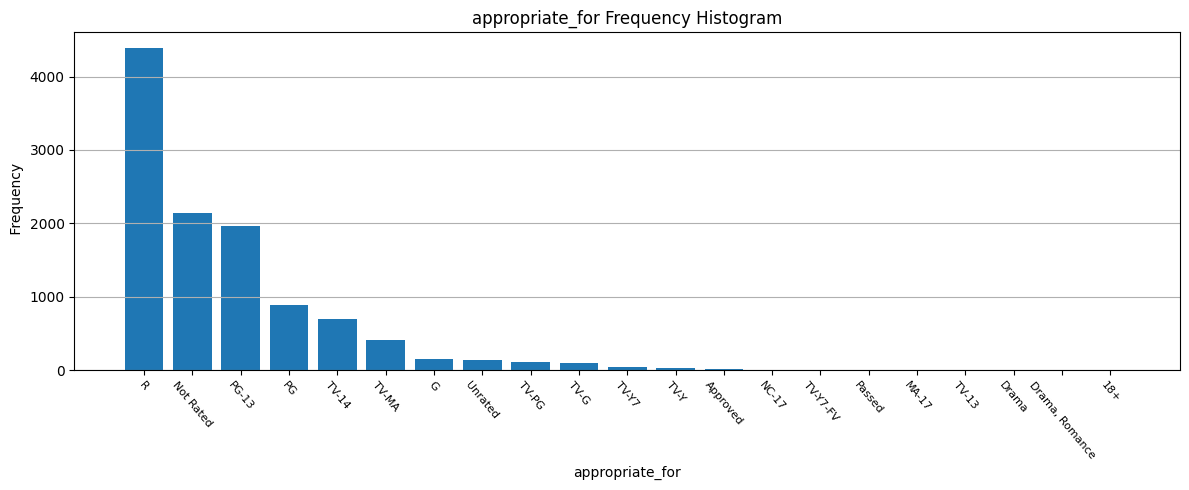

>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
Frequency information of the director
Venky Atluri                                  405
Simone Stock                                  403
Xavier Manrique                               403
John Swab                                     205
Neil Jordan                                   205
                                             ... 
Agnieszka Smoczynska                            1
Dylan Thomas Ellis                              1
Sunil Thakur, Sunil Dhawan, Shivani Thakur      1
Suman Mukhopadhyay                              1
Shea Sizemore                                   1
Name: count, Length: 9672, dtype: int64:

Missing Value Count: 1938
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
Frequency information of the id
372090    402
371744    402
371877    402
372092    202
371991    202
         ... 
303381      1
303380      1
303379      1
303377      1
30459       1
Name: count, Length: 17086, dtype: int64:

Missing Value

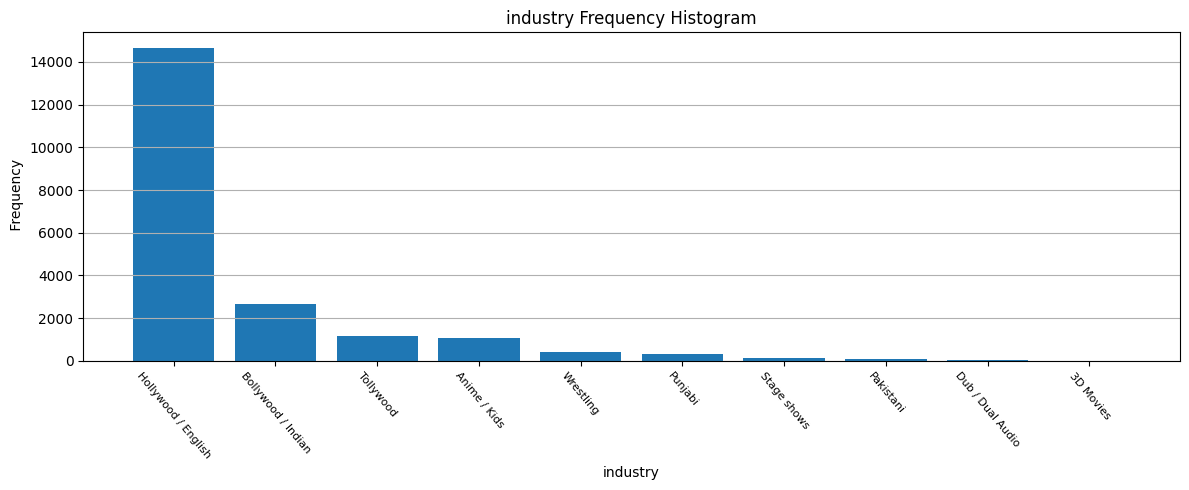

>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
Frequency information of the language
English                                 12657
Hindi                                    2558
English,Spanish                           391
Punjabi                                   310
English,Hindi                             304
                                        ...  
English,Korean,Spanish                      1
Norwegian,Swedish                           1
Spanish,Chinese,English,Maori,French        1
Urdu,Punjabi,English                        1
Spanish,German,English                      1
Name: count, Length: 1167, dtype: int64:

Missing Value Count: 546
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
Frequency information of the storyline
The life of a young man and his struggles against the privatization of education.                                                                                                                                                                       

In [6]:
analyze_freq_nominal("appropriate_for",df['appropriate_for'])
print(">>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>")
analyze_freq_nominal("director",df['director'],draw=False)
print(">>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>")
analyze_freq_nominal("id",df['id'],draw=False)
print(">>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>")
analyze_freq_nominal("industry",df['industry'])
print(">>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>")
analyze_freq_nominal("language",df['language'],draw=False)
print(">>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>")
analyze_freq_nominal("storyline",df['storyline'],draw=False)
print(">>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>")
analyze_freq_nominal("title",df['title'],draw=False)

#### 2.2 分析数值型数据
数据集中的数值型数据有：电影的IMDb评分IMDb-rating，电影的下载次数downloads，电影的时长run_time，电影的点击量views
下面我们对以上几个数值型数据逐一进行分析

The Information of IMDb-rating:

count    19707.000000
mean         5.762151
std          1.374041
min          1.100000
25%          4.800000
50%          5.700000
75%          6.600000
max          9.900000
Name: IMDb-rating, dtype: float64
Missing Value Count: 841


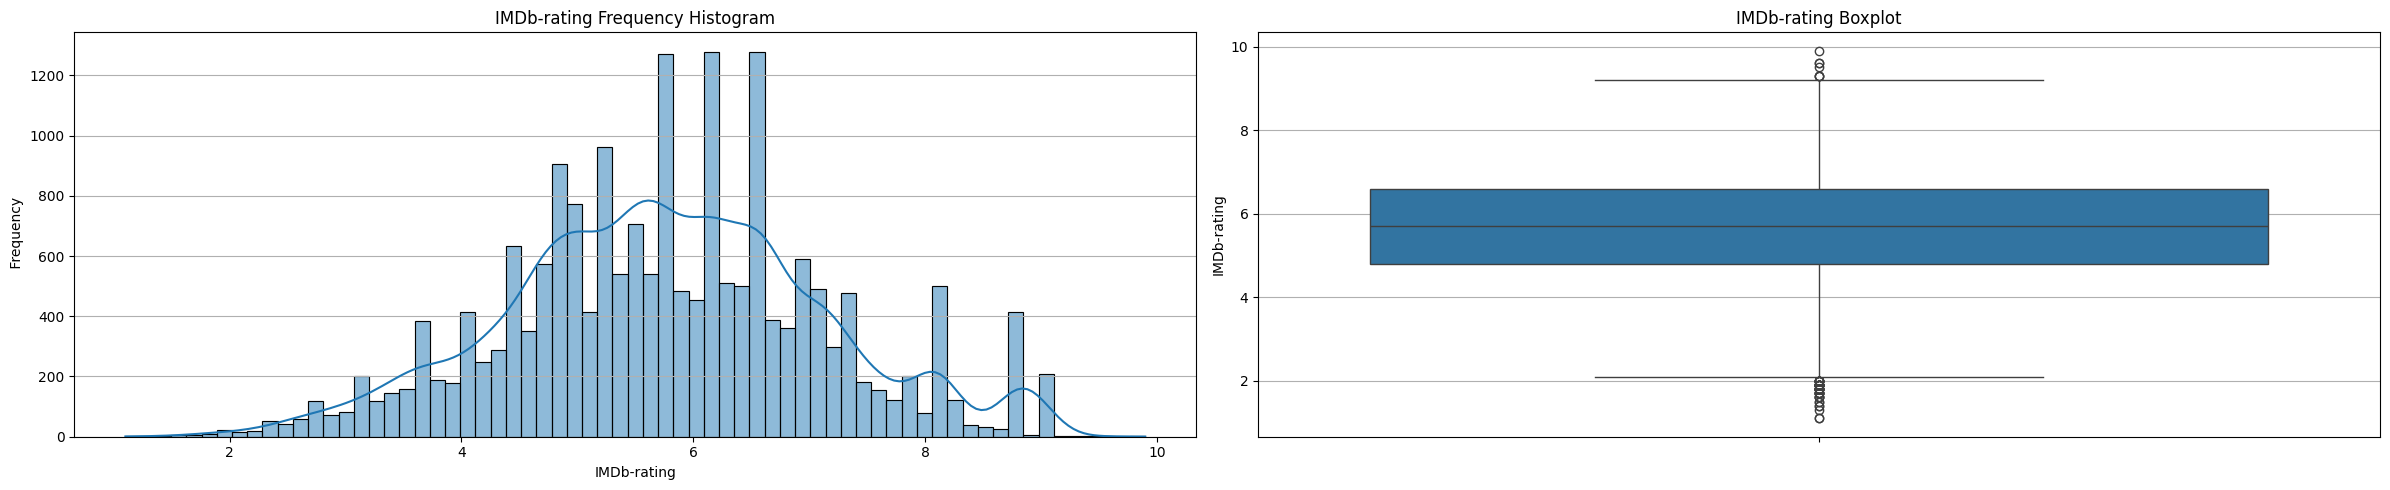

>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
The Information of downloads:

count     20547.000000
mean      10795.238916
std       23716.181987
min           0.000000
25%         855.500000
50%        2716.000000
75%       10070.000000
max      391272.000000
Name: downloads, dtype: float64
Missing Value Count: 1


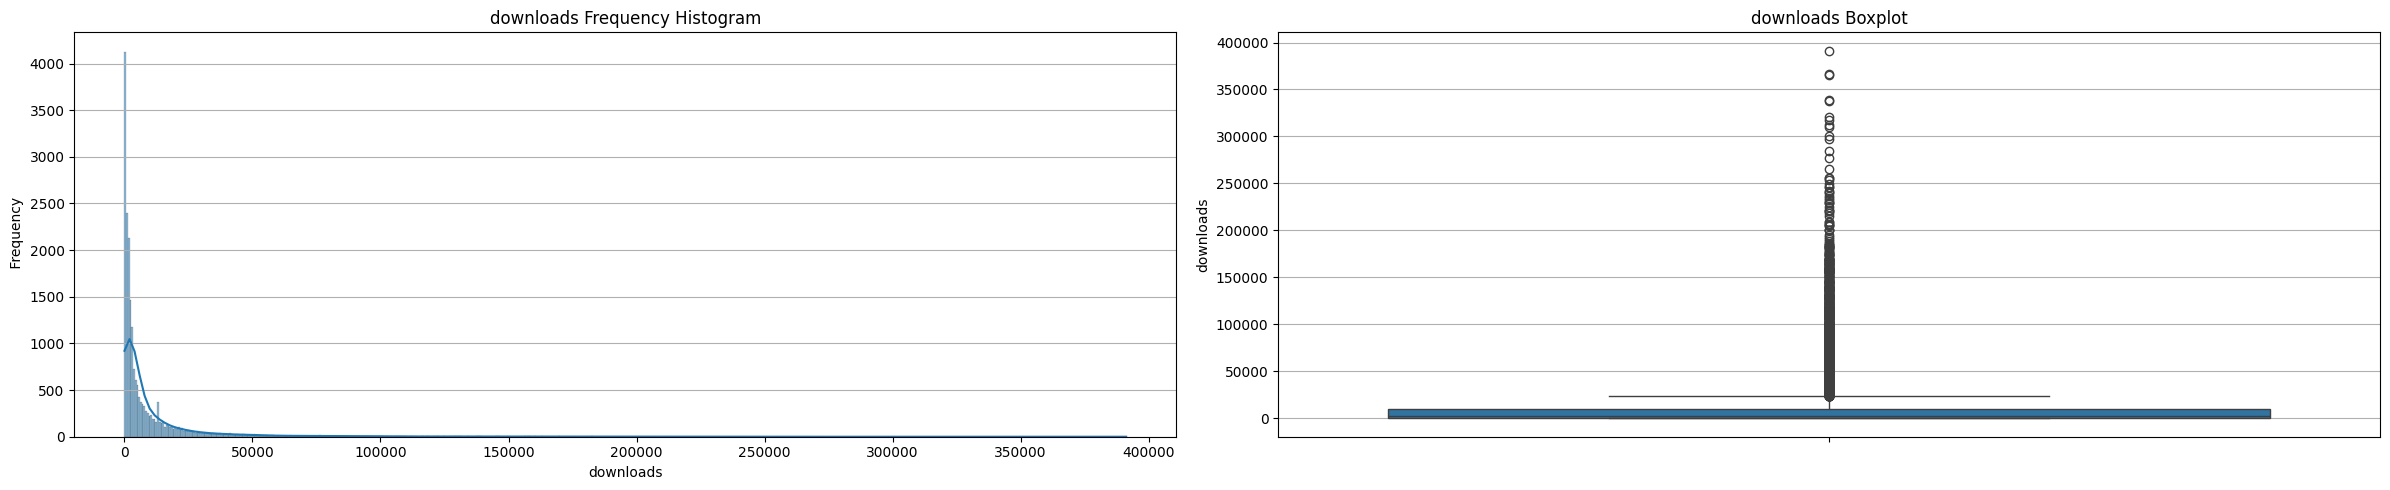

>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
The Information of downloads:

count     20547.000000
mean      10795.238916
std       23716.181987
min           0.000000
25%         855.500000
50%        2716.000000
75%       10070.000000
max      391272.000000
Name: downloads, dtype: float64
Missing Value Count: 1


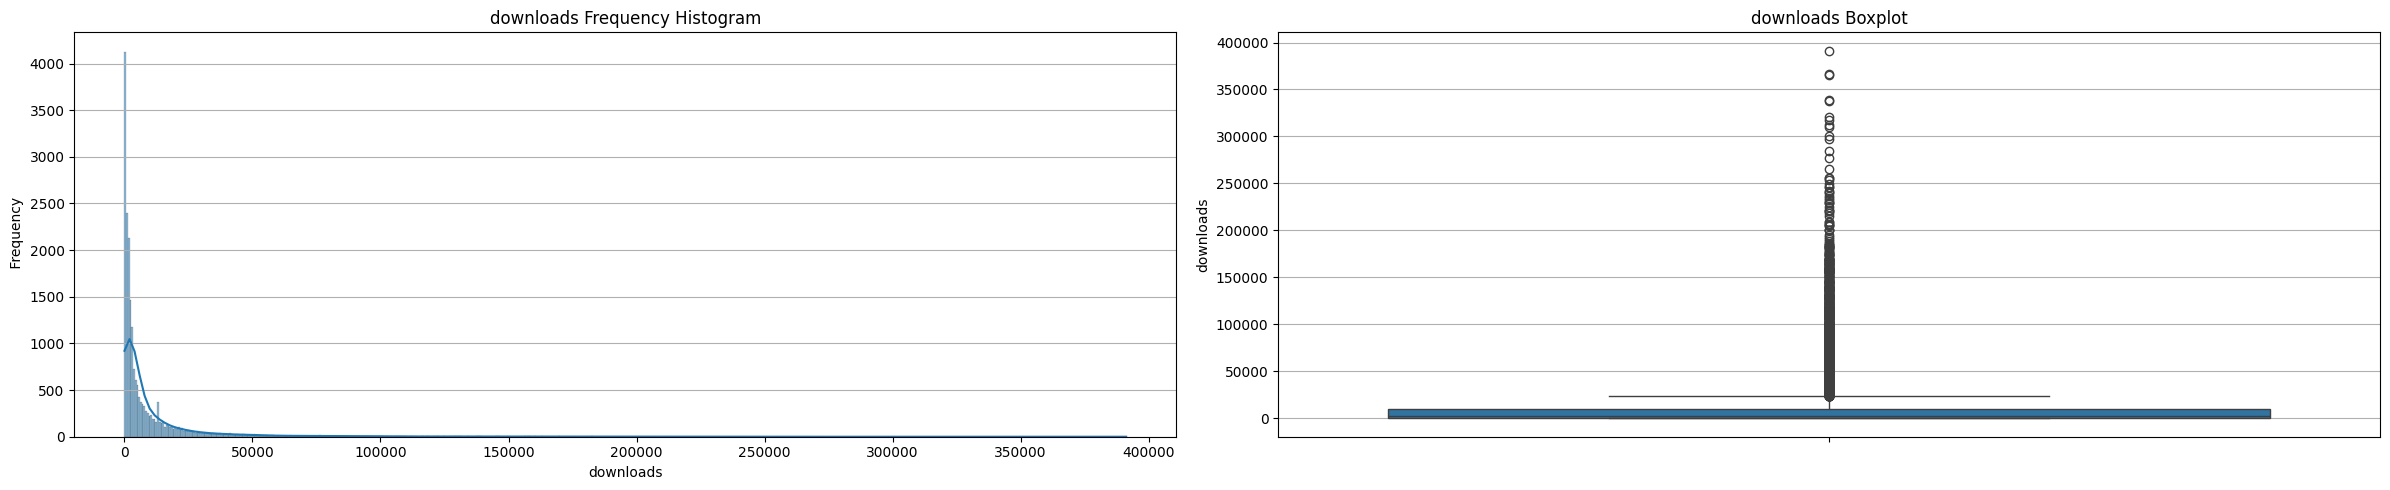

>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
The Information of run_time:

count    18780.000000
mean        98.724654
std         29.417936
min          2.000000
25%         75.000000
50%         95.000000
75%        117.000000
max        321.000000
Name: run_time, dtype: float64
Missing Value Count: 1768


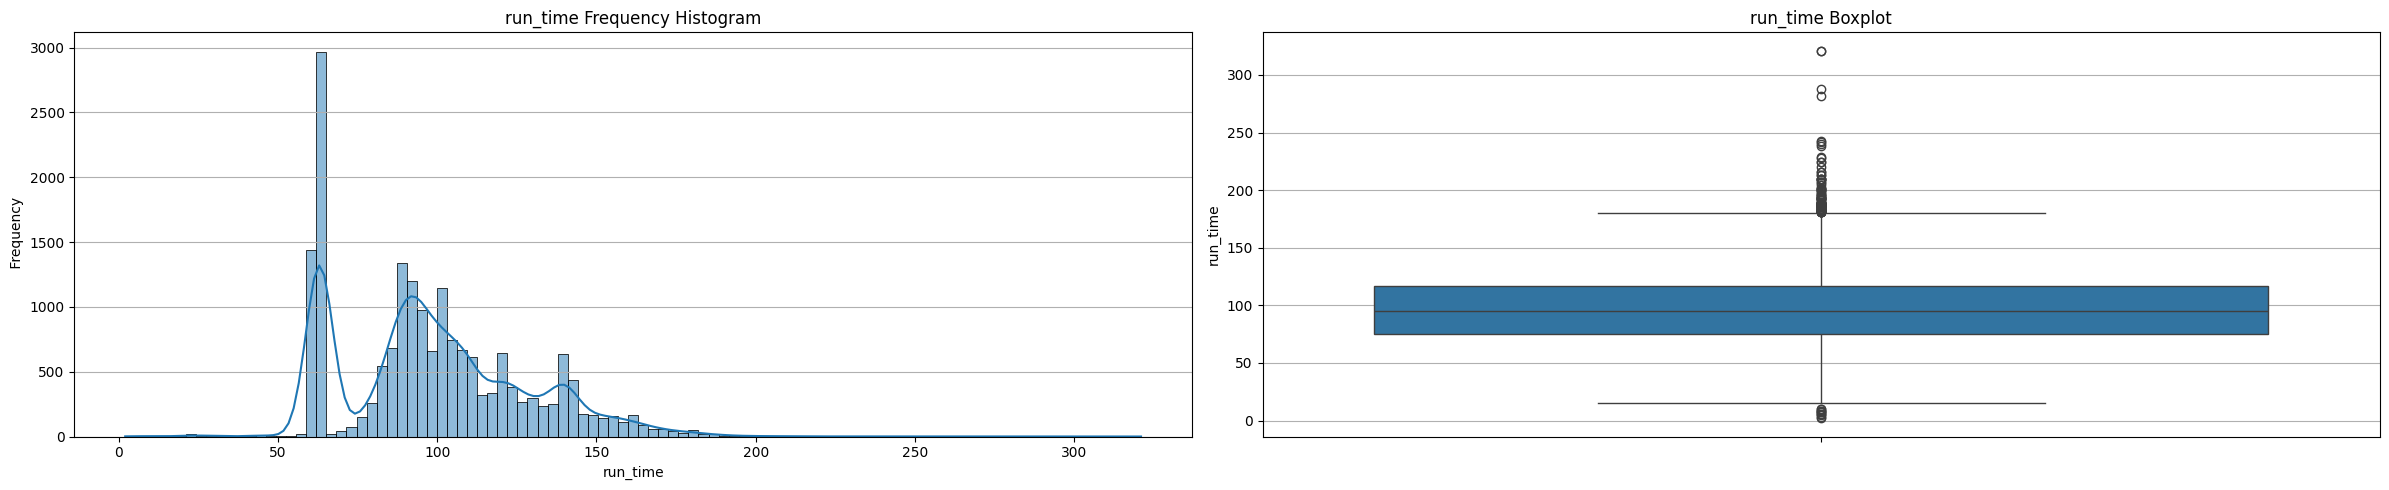

>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
The Information of views:

count    2.054700e+04
mean     3.559551e+04
std      6.247242e+04
min      6.670000e+02
25%      7.571500e+03
50%      1.522200e+04
75%      3.657100e+04
max      1.638533e+06
Name: views, dtype: float64
Missing Value Count: 1


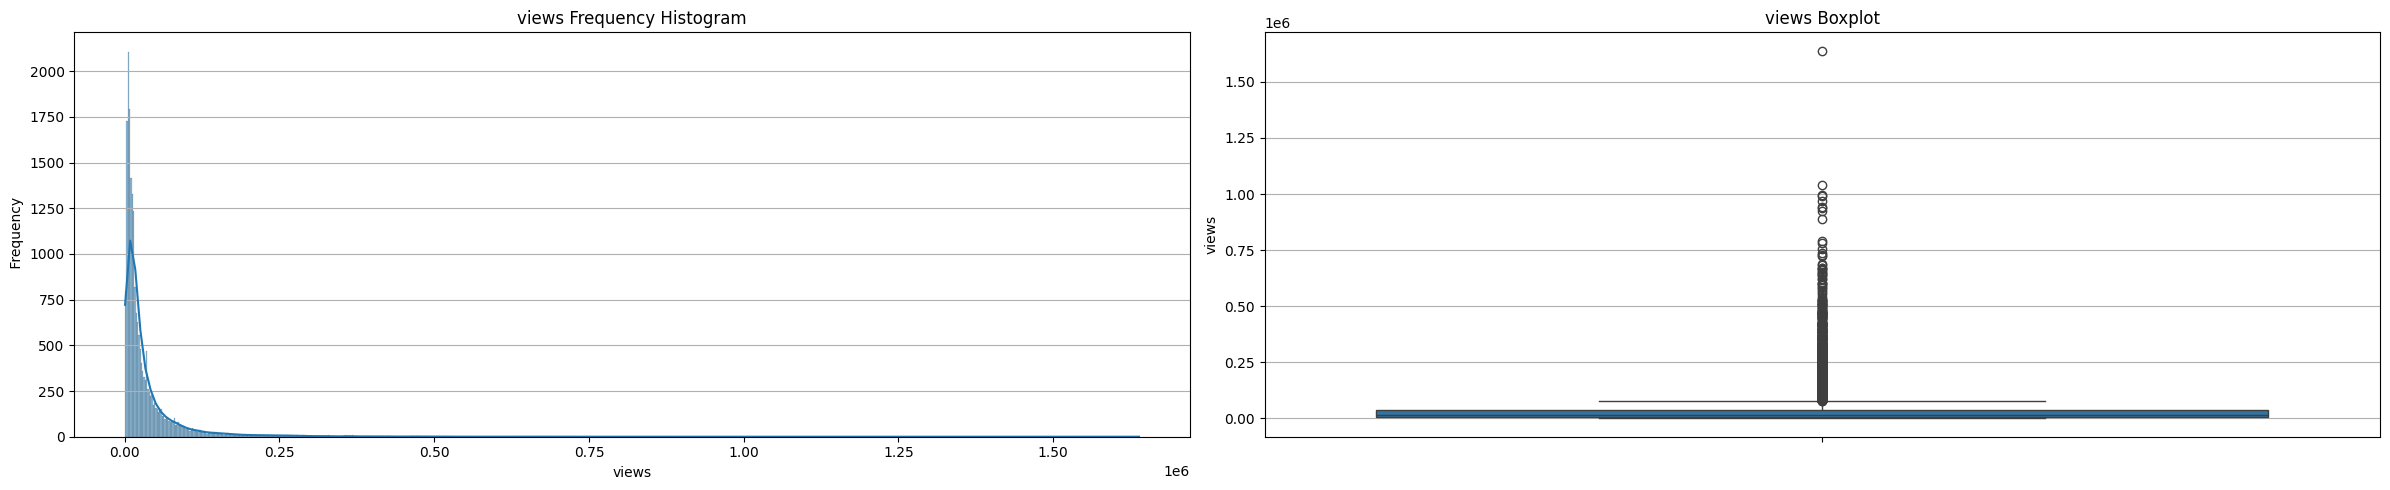

>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>


In [7]:
analyze_freq_and_box_numeric("IMDb-rating",df["IMDb-rating"])
print(">>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>")
analyze_freq_and_box_numeric("downloads",df["downloads"])
print(">>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>")
analyze_freq_and_box_numeric("downloads",df["downloads"])
print(">>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>")
analyze_freq_and_box_numeric("run_time",df["run_time"])
print(">>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>")
analyze_freq_and_box_numeric("views",df["views"])
print(">>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>")

### 3. 数据缺失的处理
观察数据集中缺失数据，分析其缺失的原因。分别使用下列四种策略对缺失值进行处理: </br>

* 将缺失部分剔除
* 用最高频率值来填补缺失值
* 通过属性的相关关系来填补缺失值
* 通过数据对象之间的相似性来填补缺失值

#### 3.1 分析数据缺失的原因
该数据集几乎所有的属性都有或多或少数量的缺失值，从前面对标称型数据和数值型数据的分析来看，二者也各自都有部分缺失值。</br>
数据缺失的原因可能有以下几点：</br>
* 在盗版电影网站上该电影的部分信息不完整
* 爬取电影信息的程序算法不完备

#### 3.2 剔除有缺失值的数据对象

In [8]:
data = df.dropna()


展示填补前的数据信息

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20548 entries, 0 to 20547
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       20548 non-null  int64  
 1   IMDb-rating      19707 non-null  float64
 2   appropriate_for  11072 non-null  object 
 3   director         18610 non-null  object 
 4   downloads        20547 non-null  float64
 5   id               20548 non-null  int64  
 6   industry         20547 non-null  object 
 7   language         20002 non-null  object 
 8   posted_date      20547 non-null  object 
 9   release_date     20547 non-null  object 
 10  run_time         18780 non-null  float64
 11  storyline        18847 non-null  object 
 12  title            20547 non-null  object 
 13  views            20547 non-null  float64
 14  writer           18356 non-null  object 
dtypes: float64(4), int64(2), object(9)
memory usage: 2.4+ MB


In [10]:
df.head(5)

,Unnamed: 0,IMDb-rating,appropriate_for,director,downloads,id,industry,language,posted_date,release_date,run_time,storyline,title,views,writer
0,0,4.8,R,John Swab,304.0,372092,Hollywood / English,English,"20 Feb, 2023",Jan 28 2023,105.0,Doc\r\n facilitates a fragile truce between th...,Little Dixie,2794.0,John Swab
1,1,6.4,TV-PG,Paul Ziller,73.0,372091,Hollywood / English,English,"20 Feb, 2023",Feb 05 2023,84.0,Caterer\r\n Goldy Berry reunites with detectiv...,Grilling Season: A Curious Caterer Mystery,1002.0,John Christian Plummer
2,2,5.2,R,Ben Wheatley,1427.0,343381,Hollywood / English,"English,Hindi","20 Apr, 2021",Jun 18 2021,64.0,As the world searches for a cure to a disastro...,In the Earth,14419.0,Ben Wheatley
3,3,8.1,NaN,Venky Atluri,1549.0,372090,Tollywood,Hindi,"20 Feb, 2023",Feb 17 2023,139.0,The life of a young man and his struggles agai...,Vaathi,4878.0,Venky Atluri
4,4,4.6,NaN,Shaji Kailas,657.0,372089,Tollywood,Hindi,"20 Feb, 2023",Jan 26 2023,122.0,A man named Kalidas gets stranded due to the p...,Alone,2438.0,Rajesh Jayaraman


填补后的数据集信息如下：

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9902 entries, 0 to 20540
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       9902 non-null   int64  
 1   IMDb-rating      9902 non-null   float64
 2   appropriate_for  9902 non-null   object 
 3   director         9902 non-null   object 
 4   downloads        9902 non-null   float64
 5   id               9902 non-null   int64  
 6   industry         9902 non-null   object 
 7   language         9902 non-null   object 
 8   posted_date      9902 non-null   object 
 9   release_date     9902 non-null   object 
 10  run_time         9902 non-null   float64
 11  storyline        9902 non-null   object 
 12  title            9902 non-null   object 
 13  views            9902 non-null   float64
 14  writer           9902 non-null   object 
dtypes: float64(4), int64(2), object(9)
memory usage: 1.2+ MB


In [12]:
data.head(5)

,Unnamed: 0,IMDb-rating,appropriate_for,director,downloads,id,industry,language,posted_date,release_date,run_time,storyline,title,views,writer
0,0,4.8,R,John Swab,304.0,372092,Hollywood / English,English,"20 Feb, 2023",Jan 28 2023,105.0,Doc\r\n facilitates a fragile truce between th...,Little Dixie,2794.0,John Swab
1,1,6.4,TV-PG,Paul Ziller,73.0,372091,Hollywood / English,English,"20 Feb, 2023",Feb 05 2023,84.0,Caterer\r\n Goldy Berry reunites with detectiv...,Grilling Season: A Curious Caterer Mystery,1002.0,John Christian Plummer
2,2,5.2,R,Ben Wheatley,1427.0,343381,Hollywood / English,"English,Hindi","20 Apr, 2021",Jun 18 2021,64.0,As the world searches for a cure to a disastro...,In the Earth,14419.0,Ben Wheatley
7,7,6.5,R,Benjamin Caron,1781.0,371751,Hollywood / English,English,"13 Feb, 2023",Feb 17 2023,116.0,"Motivations are suspect, and expectations are ...",Sharper,18225.0,"Brian Gatewood, Alessandro Tanaka"
8,8,6.9,PG-13,Ravi Kapoor,458.0,372042,Hollywood / English,English,"18 Feb, 2023",Dec 02 2022,80.0,An\r\n unmotivated South Asian American rapper...,Four Samosas,6912.0,Ravi Kapoor


##### 比较处理前后数据集差异
下面以IMDb-rating这一属性为例，对比数据集在剔除含缺失值数据对象后的差异

>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>Before Processing>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
The Information of IMDb-rating:

count    19707.000000
mean         5.762151
std          1.374041
min          1.100000
25%          4.800000
50%          5.700000
75%          6.600000
max          9.900000
Name: IMDb-rating, dtype: float64
Missing Value Count: 841


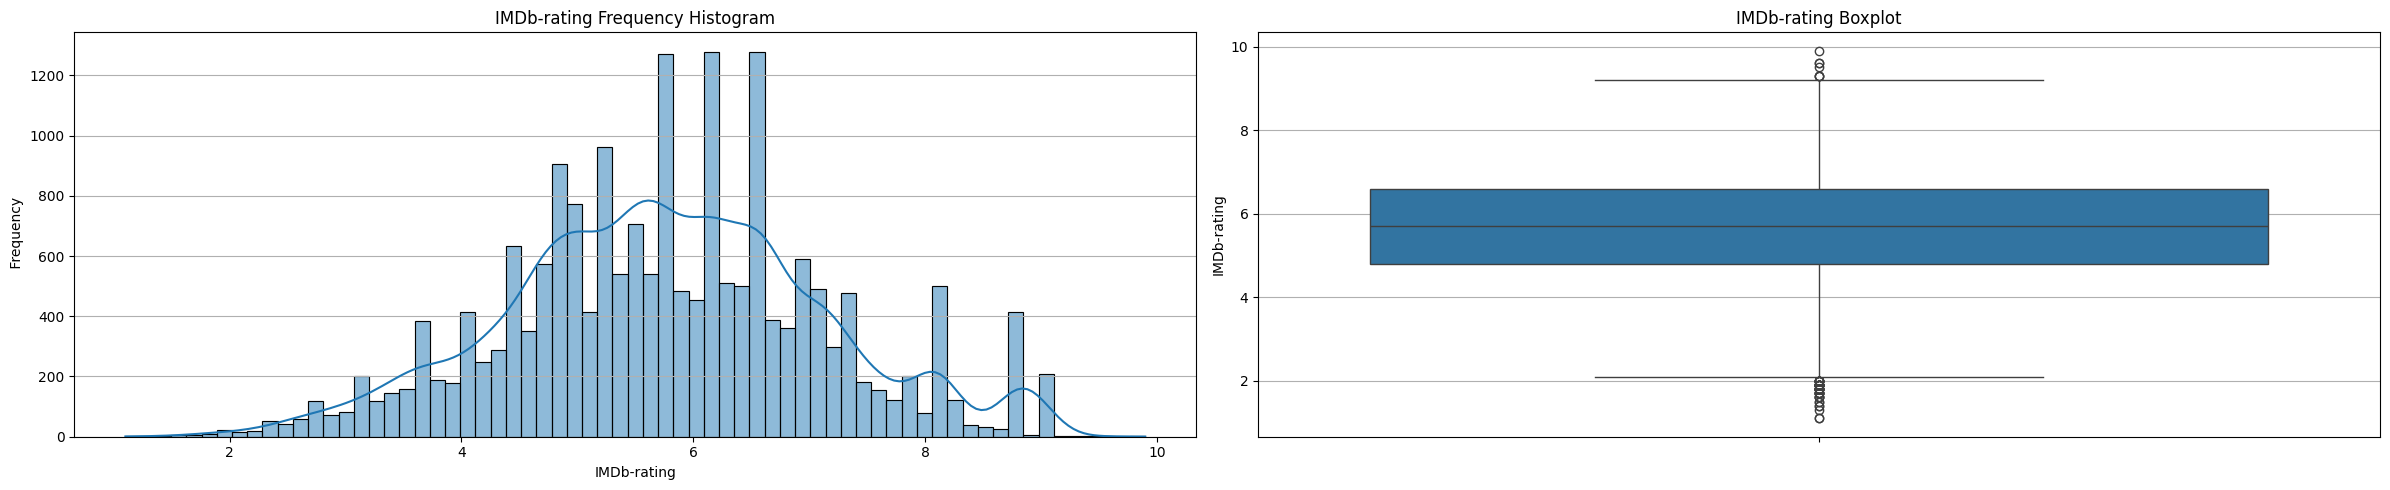

<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>After Processing>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
The Information of IMDb-rating:

count    9902.000000
mean        5.878489
std         1.195440
min         1.100000
25%         5.200000
50%         6.000000
75%         6.675000
max         9.300000
Name: IMDb-rating, dtype: float64
Missing Value Count: 0


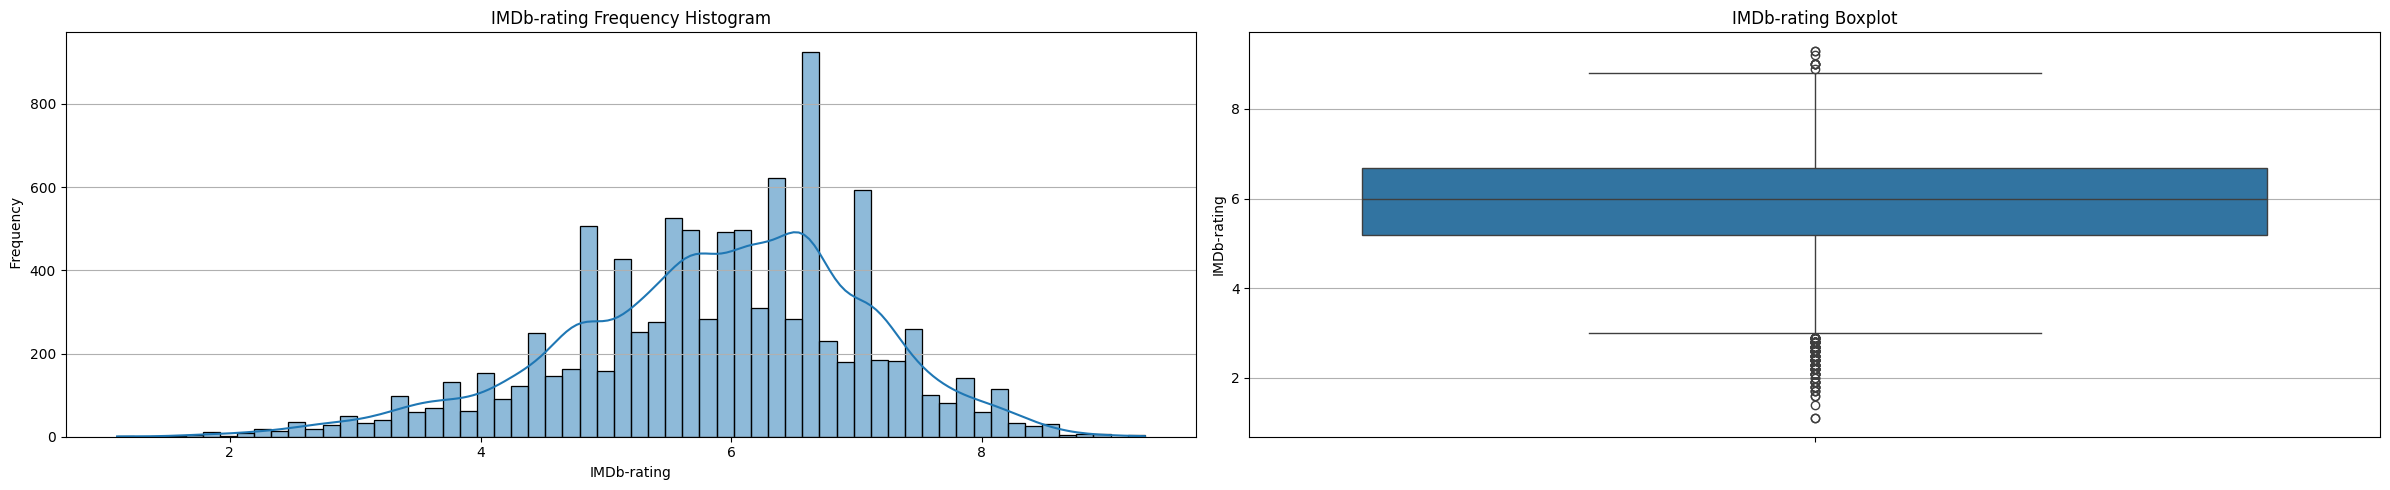

<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<


In [13]:
print(">>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>Before Processing>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>")
analyze_freq_and_box_numeric("IMDb-rating",df["IMDb-rating"])
print("<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<")
print(">>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>After Processing>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>")
analyze_freq_and_box_numeric("IMDb-rating",data["IMDb-rating"])
print("<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<")

#### 3.3 用最高频率值来填补缺失值 

In [14]:
data = df.copy(deep=True)

展示填补前的数据信息

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20548 entries, 0 to 20547
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       20548 non-null  int64  
 1   IMDb-rating      19707 non-null  float64
 2   appropriate_for  11072 non-null  object 
 3   director         18610 non-null  object 
 4   downloads        20547 non-null  float64
 5   id               20548 non-null  int64  
 6   industry         20547 non-null  object 
 7   language         20002 non-null  object 
 8   posted_date      20547 non-null  object 
 9   release_date     20547 non-null  object 
 10  run_time         18780 non-null  float64
 11  storyline        18847 non-null  object 
 12  title            20547 non-null  object 
 13  views            20547 non-null  float64
 14  writer           18356 non-null  object 
dtypes: float64(4), int64(2), object(9)
memory usage: 2.4+ MB


In [16]:
data.head(5)

,Unnamed: 0,IMDb-rating,appropriate_for,director,downloads,id,industry,language,posted_date,release_date,run_time,storyline,title,views,writer
0,0,4.8,R,John Swab,304.0,372092,Hollywood / English,English,"20 Feb, 2023",Jan 28 2023,105.0,Doc\r\n facilitates a fragile truce between th...,Little Dixie,2794.0,John Swab
1,1,6.4,TV-PG,Paul Ziller,73.0,372091,Hollywood / English,English,"20 Feb, 2023",Feb 05 2023,84.0,Caterer\r\n Goldy Berry reunites with detectiv...,Grilling Season: A Curious Caterer Mystery,1002.0,John Christian Plummer
2,2,5.2,R,Ben Wheatley,1427.0,343381,Hollywood / English,"English,Hindi","20 Apr, 2021",Jun 18 2021,64.0,As the world searches for a cure to a disastro...,In the Earth,14419.0,Ben Wheatley
3,3,8.1,NaN,Venky Atluri,1549.0,372090,Tollywood,Hindi,"20 Feb, 2023",Feb 17 2023,139.0,The life of a young man and his struggles agai...,Vaathi,4878.0,Venky Atluri
4,4,4.6,NaN,Shaji Kailas,657.0,372089,Tollywood,Hindi,"20 Feb, 2023",Jan 26 2023,122.0,A man named Kalidas gets stranded due to the p...,Alone,2438.0,Rajesh Jayaraman


In [17]:
for i in data.columns:
    if not data[i].isnull().any():
        continue
    data[i] = data[i].fillna(data[i].dropna().mode()[0])

填补后的数据集信息如下：

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20548 entries, 0 to 20547
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       20548 non-null  int64  
 1   IMDb-rating      20548 non-null  float64
 2   appropriate_for  20548 non-null  object 
 3   director         20548 non-null  object 
 4   downloads        20548 non-null  float64
 5   id               20548 non-null  int64  
 6   industry         20548 non-null  object 
 7   language         20548 non-null  object 
 8   posted_date      20548 non-null  object 
 9   release_date     20548 non-null  object 
 10  run_time         20548 non-null  float64
 11  storyline        20548 non-null  object 
 12  title            20548 non-null  object 
 13  views            20548 non-null  float64
 14  writer           20548 non-null  object 
dtypes: float64(4), int64(2), object(9)
memory usage: 2.4+ MB


In [19]:
data.head(5)

,Unnamed: 0,IMDb-rating,appropriate_for,director,downloads,id,industry,language,posted_date,release_date,run_time,storyline,title,views,writer
0,0,4.8,R,John Swab,304.0,372092,Hollywood / English,English,"20 Feb, 2023",Jan 28 2023,105.0,Doc\r\n facilitates a fragile truce between th...,Little Dixie,2794.0,John Swab
1,1,6.4,TV-PG,Paul Ziller,73.0,372091,Hollywood / English,English,"20 Feb, 2023",Feb 05 2023,84.0,Caterer\r\n Goldy Berry reunites with detectiv...,Grilling Season: A Curious Caterer Mystery,1002.0,John Christian Plummer
2,2,5.2,R,Ben Wheatley,1427.0,343381,Hollywood / English,"English,Hindi","20 Apr, 2021",Jun 18 2021,64.0,As the world searches for a cure to a disastro...,In the Earth,14419.0,Ben Wheatley
3,3,8.1,R,Venky Atluri,1549.0,372090,Tollywood,Hindi,"20 Feb, 2023",Feb 17 2023,139.0,The life of a young man and his struggles agai...,Vaathi,4878.0,Venky Atluri
4,4,4.6,R,Shaji Kailas,657.0,372089,Tollywood,Hindi,"20 Feb, 2023",Jan 26 2023,122.0,A man named Kalidas gets stranded due to the p...,Alone,2438.0,Rajesh Jayaraman


##### 比较处理前后数据集差异
下面以IMDb-rating这一属性为例，对比数据集在剔除含缺失值数据对象后的差异

>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>Before Processing>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
The Information of IMDb-rating:

count    19707.000000
mean         5.762151
std          1.374041
min          1.100000
25%          4.800000
50%          5.700000
75%          6.600000
max          9.900000
Name: IMDb-rating, dtype: float64
Missing Value Count: 841


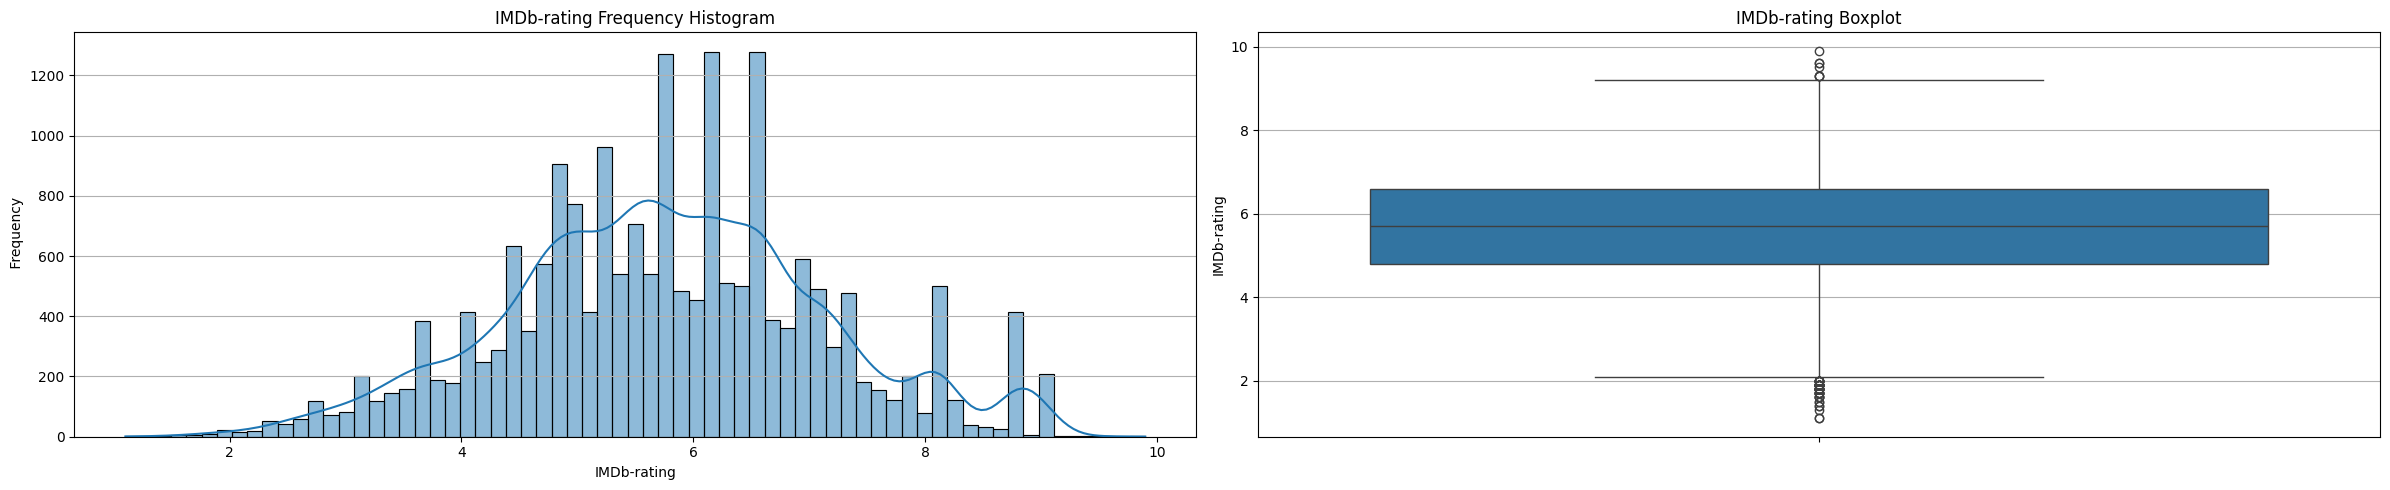

<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>After Processing>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
The Information of IMDb-rating:

count    20548.000000
mean         5.796442
std          1.355827
min          1.100000
25%          4.900000
50%          5.800000
75%          6.600000
max          9.900000
Name: IMDb-rating, dtype: float64
Missing Value Count: 0


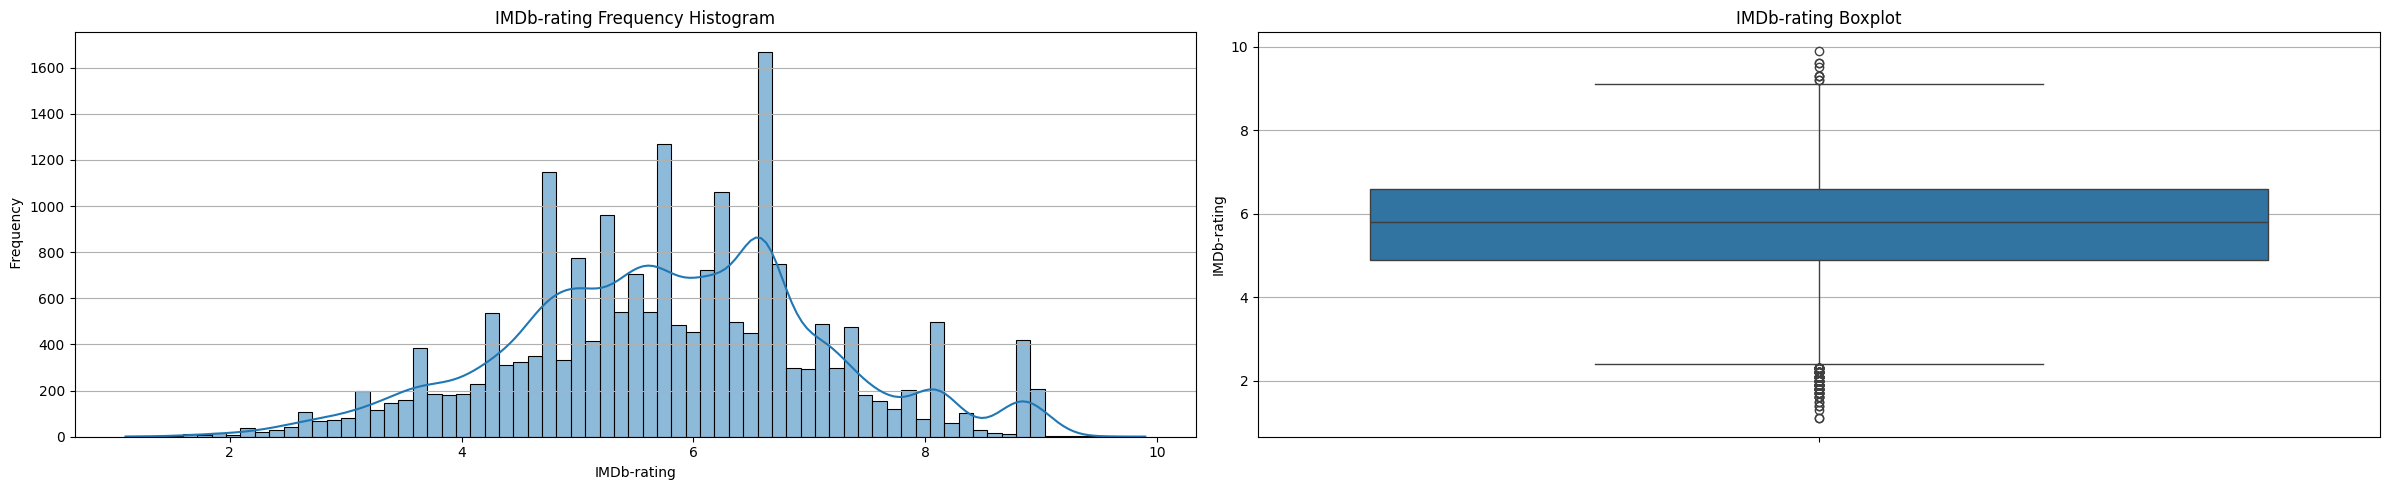

<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<


In [20]:
print(">>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>Before Processing>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>")
analyze_freq_and_box_numeric("IMDb-rating",df["IMDb-rating"])
print("<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<")
print(">>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>After Processing>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>")
analyze_freq_and_box_numeric("IMDb-rating",data["IMDb-rating"])
print("<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<")

#### 3.4 根据属性的相关关系填补缺失值 
我们采用相关系数来判断两个属性间的相似度，并根据属性间的相似度，来寻找可替代的同类型属性，若相似度较低，则用该属性的均值填充，可填充的数值属性有"IMDb-rating"，"downloads"，"run_time"，"views"

In [21]:
selected_columns = ["IMDb-rating","downloads","run_time","views"]
data = df[selected_columns].copy(deep=True)

展示填补前的数据信息

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20548 entries, 0 to 20547
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   IMDb-rating  19707 non-null  float64
 1   downloads    20547 non-null  float64
 2   run_time     18780 non-null  float64
 3   views        20547 non-null  float64
dtypes: float64(4)
memory usage: 642.2 KB


In [23]:
data.head(20)

,IMDb-rating,downloads,run_time,views
0,4.8,304.0,105.0,2794.0
1,6.4,73.0,84.0,1002.0
2,5.2,1427.0,64.0,14419.0
3,8.1,1549.0,139.0,4878.0
4,4.6,657.0,122.0,2438.0
5,5.4,746.0,131.0,2940.0
6,NaN,5332.0,200.0,11978.0
7,6.5,1781.0,116.0,18225.0
8,6.9,458.0,80.0,6912.0
9,4.2,1965.0,80.0,9710.0


下面以热力图的形式展示数据属性间的相关系数

<Axes: >

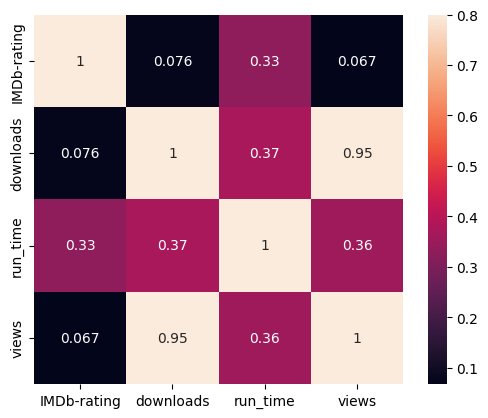

In [24]:
sns.heatmap(data.corr(), vmax=.8, square=True, annot=True)

可以看到只有downloads和views相关性较高，相关系数为0.95，所以只有这两个变量能勉强相互替代，对于其他的属性，我们用属性的均值填补

In [25]:
data["IMDb-rating"] = data["IMDb-rating"].fillna(data["IMDb-rating"].mean())
data["run_time"] = data["run_time"].fillna(data["run_time"].mean())
data["downloads"] = data["downloads"].fillna(data["views"])
data["views"] = data["views"].fillna(data["downloads"])
data["downloads"] = data["downloads"].fillna(data["downloads"].mean())
data["views"] = data["views"].fillna(data["views"].mean())

填补后的数据集部分信息如下：

In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20548 entries, 0 to 20547
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   IMDb-rating  20548 non-null  float64
 1   downloads    20548 non-null  float64
 2   run_time     20548 non-null  float64
 3   views        20548 non-null  float64
dtypes: float64(4)
memory usage: 642.2 KB


In [27]:
data.head(20)

,IMDb-rating,downloads,run_time,views
0,4.800000,304.0,105.000000,2794.0
1,6.400000,73.0,84.000000,1002.0
2,5.200000,1427.0,64.000000,14419.0
3,8.100000,1549.0,139.000000,4878.0
4,4.600000,657.0,122.000000,2438.0
5,5.400000,746.0,131.000000,2940.0
6,5.762151,5332.0,200.000000,11978.0
7,6.500000,1781.0,116.000000,18225.0
8,6.900000,458.0,80.000000,6912.0
9,4.200000,1965.0,80.000000,9710.0


##### 比较处理前后数据集差异
下面以downloads这一属性为例，对比数据集在剔除含缺失值数据对象后的差异

>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>Before Processing>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
The Information of downloads:

count     20547.000000
mean      10795.238916
std       23716.181987
min           0.000000
25%         855.500000
50%        2716.000000
75%       10070.000000
max      391272.000000
Name: downloads, dtype: float64
Missing Value Count: 1


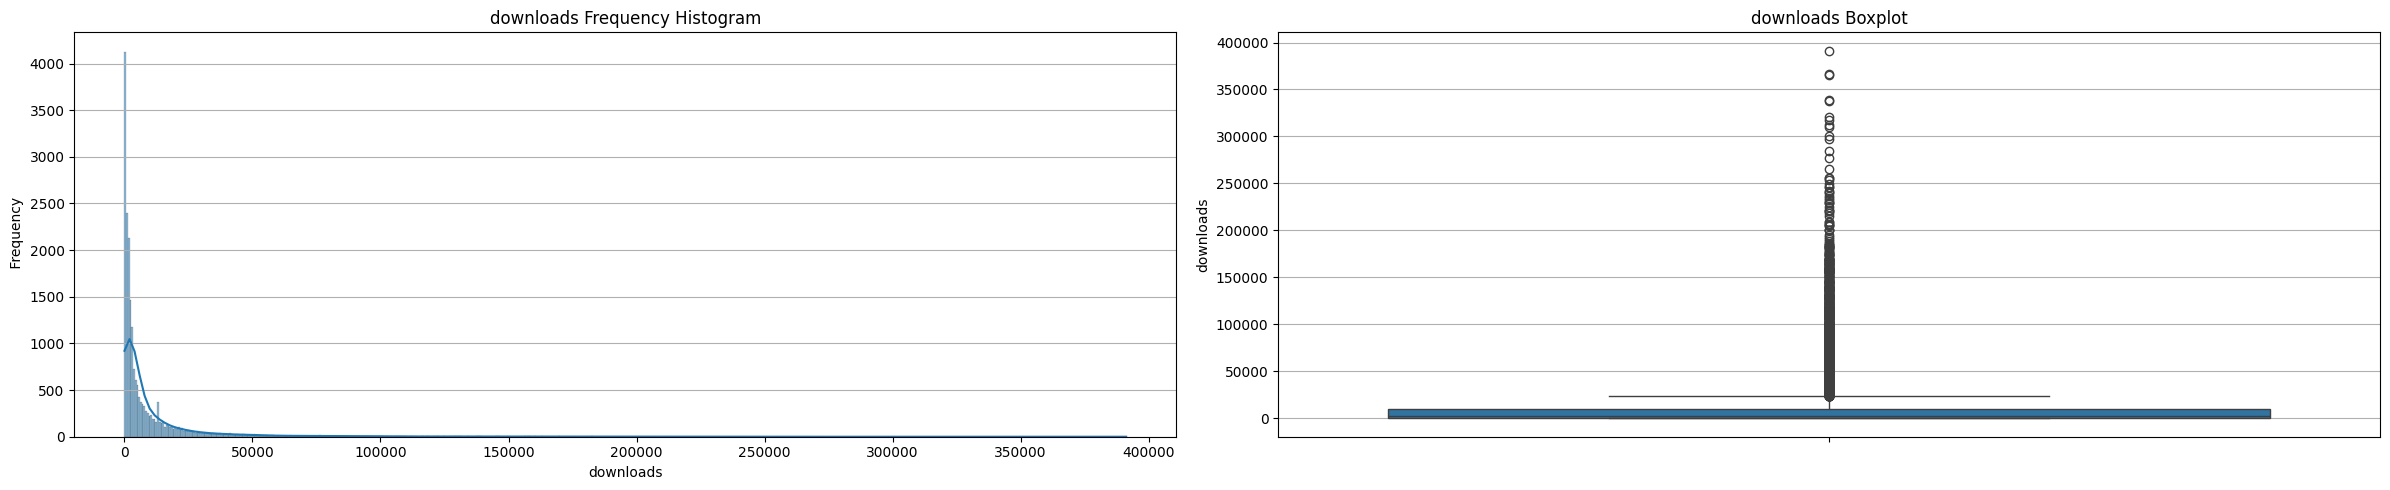

<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>After Processing>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
The Information of downloads:

count     20548.000000
mean      10795.238916
std       23715.604860
min           0.000000
25%         855.750000
50%        2716.000000
75%       10073.250000
max      391272.000000
Name: downloads, dtype: float64
Missing Value Count: 0


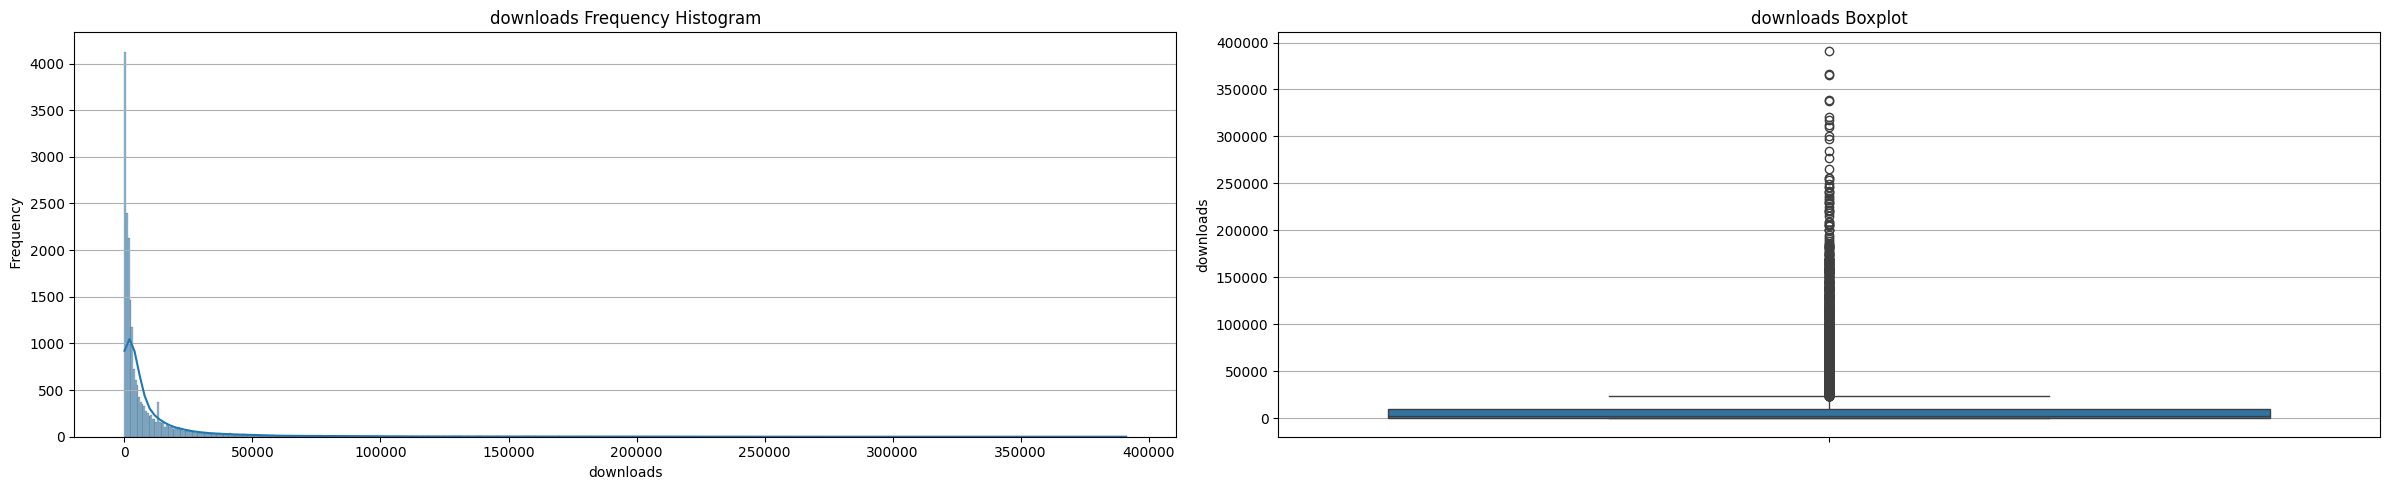

<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<


In [28]:
print(">>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>Before Processing>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>")
analyze_freq_and_box_numeric("downloads",df["downloads"])
print("<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<")
print(">>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>After Processing>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>")
analyze_freq_and_box_numeric("downloads",data["downloads"])
print("<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<")

#### 3.5 通过数据对象之间的相似性来填补缺失值
我们将数值属性向量化，然后使用K临近算法——KNN来计算数据对象间的距离，以此来判断数据对象间的相似性，再根据寻找的k个相似的数据对象的相关信息来填补当前对象的缺失值，可填充的数值属性有"IMDb-rating"，"downloads"，"run_time"，"views"

In [29]:
data = df[selected_columns].copy()


展示填补前的数据信息

In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20548 entries, 0 to 20547
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   IMDb-rating  19707 non-null  float64
 1   downloads    20547 non-null  float64
 2   run_time     18780 non-null  float64
 3   views        20547 non-null  float64
dtypes: float64(4)
memory usage: 642.2 KB


In [31]:
data.head(20)

,IMDb-rating,downloads,run_time,views
0,4.8,304.0,105.0,2794.0
1,6.4,73.0,84.0,1002.0
2,5.2,1427.0,64.0,14419.0
3,8.1,1549.0,139.0,4878.0
4,4.6,657.0,122.0,2438.0
5,5.4,746.0,131.0,2940.0
6,NaN,5332.0,200.0,11978.0
7,6.5,1781.0,116.0,18225.0
8,6.9,458.0,80.0,6912.0
9,4.2,1965.0,80.0,9710.0


调用KNN的包来对数据进行填补，我们选择k=2作为参数

In [32]:
from sklearn.impute import KNNImputer
data = df[selected_columns].copy()
knn_imputer = KNNImputer(n_neighbors=2)

df_imputed = knn_imputer.fit_transform(data)

data = pd.DataFrame(df_imputed, columns=data.columns)

展示填补后的数据信息

In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20548 entries, 0 to 20547
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   IMDb-rating  20548 non-null  float64
 1   downloads    20548 non-null  float64
 2   run_time     20548 non-null  float64
 3   views        20548 non-null  float64
dtypes: float64(4)
memory usage: 642.2 KB


In [34]:
data.head(20)

,IMDb-rating,downloads,run_time,views
0,4.80,304.0,105.0,2794.0
1,6.40,73.0,84.0,1002.0
2,5.20,1427.0,64.0,14419.0
3,8.10,1549.0,139.0,4878.0
4,4.60,657.0,122.0,2438.0
5,5.40,746.0,131.0,2940.0
6,4.65,5332.0,200.0,11978.0
7,6.50,1781.0,116.0,18225.0
8,6.90,458.0,80.0,6912.0
9,4.20,1965.0,80.0,9710.0


##### 比较处理前后数据集差异
下面以IMDb-rating这一属性为例，对比数据集在剔除含缺失值数据对象后的差异

>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>Before Processing>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
The Information of IMDb-rating:

count    19707.000000
mean         5.762151
std          1.374041
min          1.100000
25%          4.800000
50%          5.700000
75%          6.600000
max          9.900000
Name: IMDb-rating, dtype: float64
Missing Value Count: 841


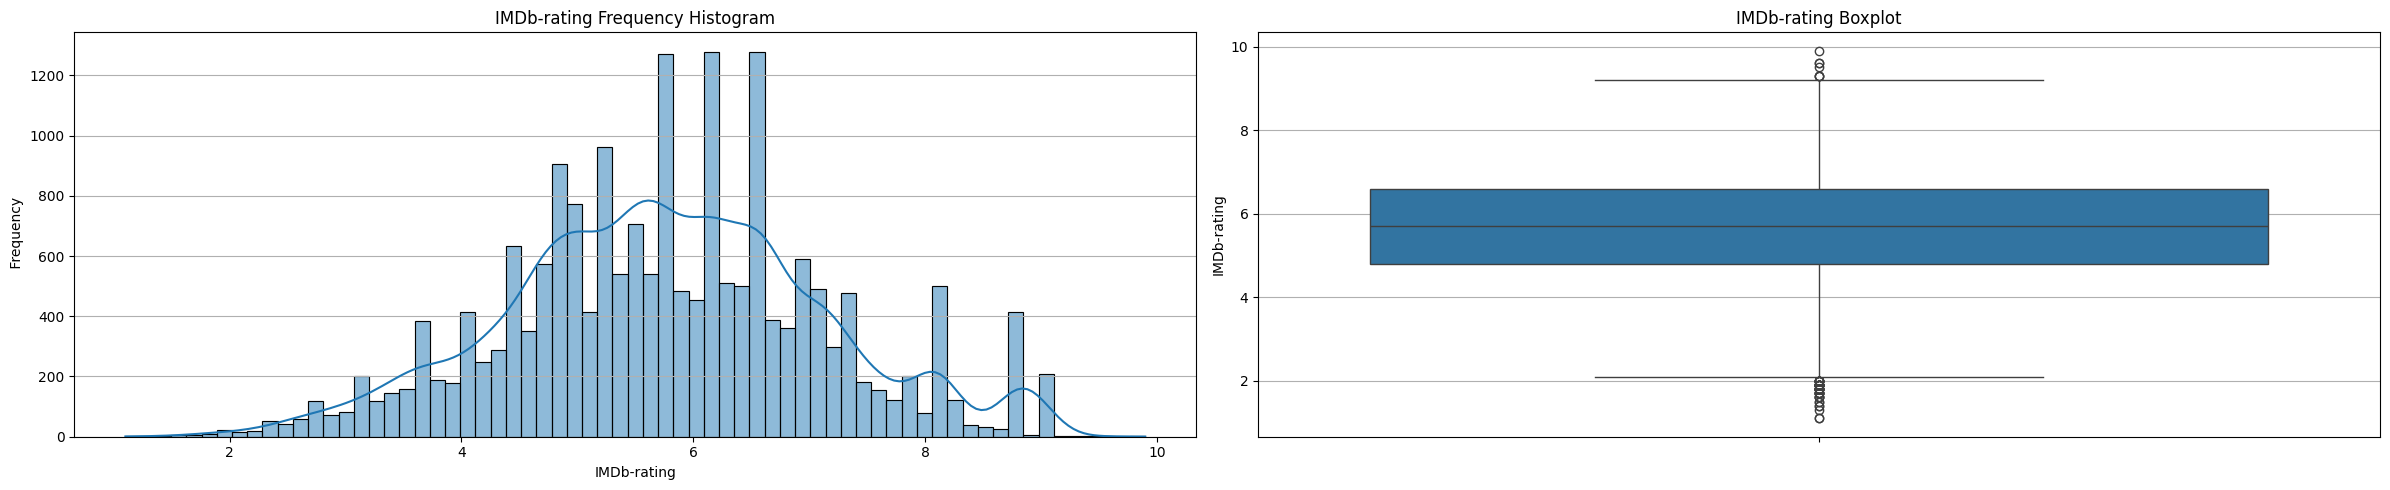

<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>After Processing>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
The Information of IMDb-rating:

count    20548.000000
mean         5.767924
std          1.362141
min          1.100000
25%          4.900000
50%          5.700000
75%          6.600000
max          9.900000
Name: IMDb-rating, dtype: float64
Missing Value Count: 0


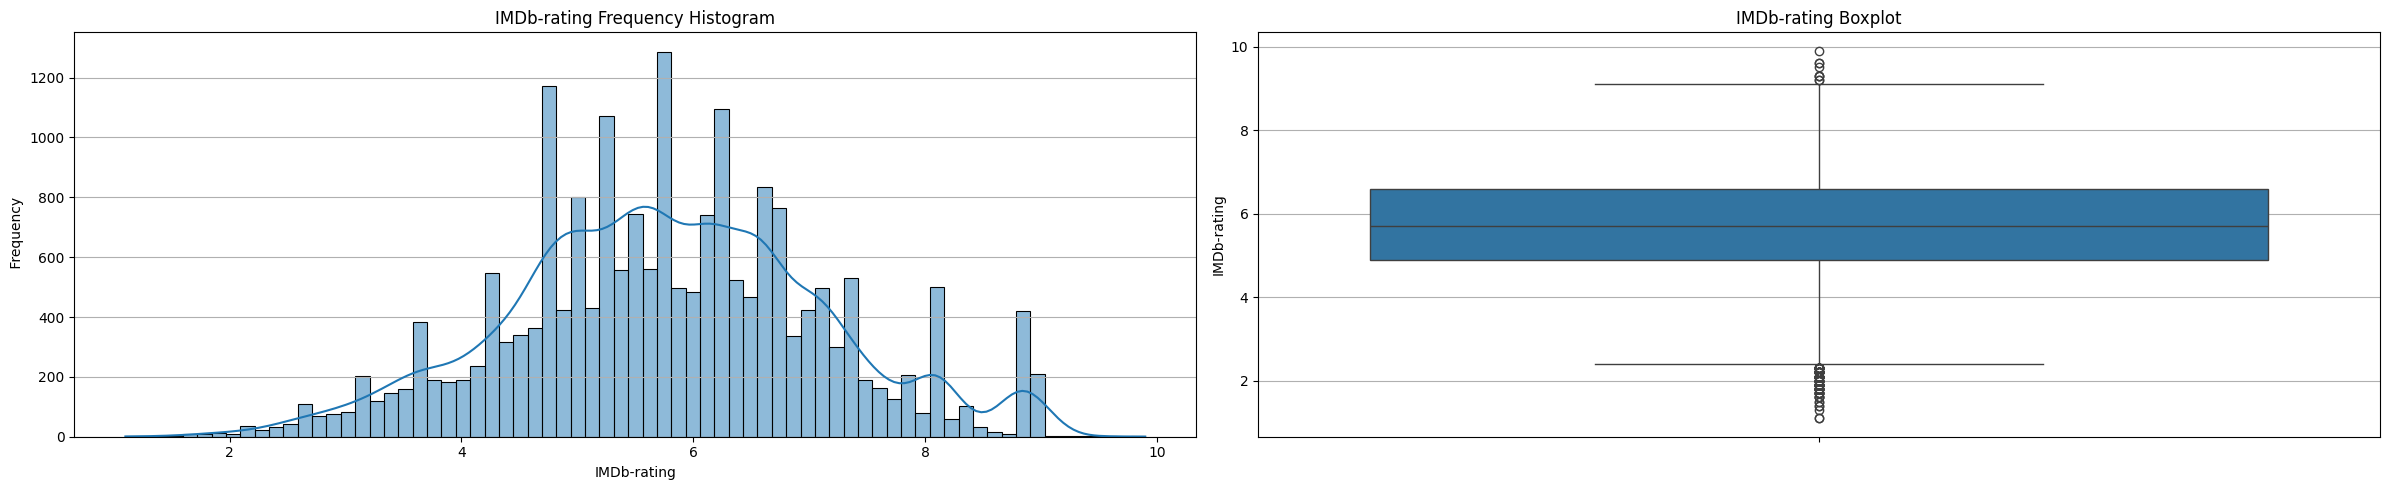

<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<


In [35]:
print(">>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>Before Processing>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>")
analyze_freq_and_box_numeric("IMDb-rating",df["IMDb-rating"])
print("<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<")
print(">>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>After Processing>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>")
analyze_freq_and_box_numeric("IMDb-rating",data["IMDb-rating"])
print("<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<")

### 总结
至此，我们对Movies Dataset from Pirated Sites数据集的预处理和探索性分析全部完成